# Identifying the Best Classification Method 

## Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

## Data Retreiving

In [5]:
y = pd.read_csv('classification_fasta_processed.csv')
embeddings = np.load('all_embeddings_100m_mean.npy')
print("Y Shape: ", y.shape)
print("Embeddings Shape: ", embeddings.shape)

Y Shape:  (6646, 2)
Embeddings Shape:  (6646, 1280)


In [6]:
num_features = embeddings.shape[1]
embeddings_df = pd.DataFrame(data=embeddings, columns=[f'feature_{i}' for i in range(num_features)])
combined_df = pd.concat([y, embeddings_df], axis=1)
combined_df

,Sequences,Strengths,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,tagatgtccttgattaacaccaaaattaaaccttttaaaaaccagg...,1,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
1,aaagaaaataattaattttacagctgttaaaccaaacggttataac...,1,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
2,ctgctgttccttgcgatcgaaaagatcaagggcggaccggtatccg...,1,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
3,gcggaagcacaaattgcaccaggtacggaactaaaagccgtagatg...,1,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
4,aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...,1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,-1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6642,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,-1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6643,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,-1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6644,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,-1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114


In [7]:
target_column = 'log2_foldchange'

# Shuffle the DataFrame
df_shuffled = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into train, validation, and test sets
train_ratio = 0.7
validation_ratio = 0.1
test_ratio = 0.2

# Calculate the split indices
train_idx, test_idx = train_test_split(df_shuffled.index, test_size=0.2, random_state=42)

# Create the train, validation, and test DataFrames
df_train = df_shuffled.loc[train_idx]
df_test = df_shuffled.loc[test_idx]

# Drop the index columns
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Display the sizes of the resulting DataFrames
print(f"Train set size: {len(df_train)}")
print(f"Test set size: {len(df_test)}")

Train set size: 5316
Test set size: 1330


In [8]:
# Save DataFrames to CSV files
df_train.to_csv('train_data_clf_mean.csv', index=False)
df_test.to_csv('test_data_clf_mean.csv', index=False)

## MultiClass Classification

In [9]:
# Train a classifier model on the df_train
df_train['Strengths'] = df_train['Strengths'].replace(-1, 2)
X = df_train.drop(columns=['Sequences','Strengths'], axis=1)
y = df_train['Strengths']

## Method 1: XGB Classifier

### Basic 

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGB Classifier Statistics:")
print(f'Accuracy: {accuracy:.2f}')

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

XGB Classifier Statistics:
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43       265
           1       0.57      0.24      0.34       228
           2       0.71      1.00      0.83       571

    accuracy                           0.68      1064
   macro avg       0.62      0.53      0.53      1064
weighted avg       0.64      0.68      0.63      1064



### Hyperparameters Tuned

In [8]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'objective': ['multi:softmax'],
    'num_class': [3],
    'random_state': [42]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Make Predictions with the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the Best Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

## Method 2: Random Forest Classifier

### Basic:

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the classifier
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("XGB Classifier Statistics:")
print("Random Forest Accuracy:", rf_accuracy)

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, rf_pred))

XGB Classifier Statistics:
Random Forest Accuracy: 0.6757518796992481
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43       265
           1       0.57      0.24      0.34       228
           2       0.71      1.00      0.83       571

    accuracy                           0.68      1064
   macro avg       0.62      0.53      0.53      1064
weighted avg       0.64      0.68      0.63      1064



### Hyperparameters Tuned

In [10]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42]
}

# Step 4: Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Step 5: Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Step 7: Make Predictions with the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 8: Evaluate the Best Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

## Method 3: SVC

### Basic

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an SVC classifier
svc_model = SVC(random_state=42)

# Train the classifier
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_pred = svc_model.predict(X_test)

# Evaluate the accuracy
svc_accuracy = accuracy_score(y_test, svc_pred)
print("SVC Statistics:")
print("SVC Accuracy:", svc_accuracy)

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, svc_pred))

SVC Statistics:
SVC Accuracy: 0.6625939849624061
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51       265
           1       0.00      0.00      0.00       228
           2       0.71      1.00      0.83       571

    accuracy                           0.66      1064
   macro avg       0.41      0.50      0.45      1064
weighted avg       0.51      0.66      0.57      1064



/opt/anaconda3/envs/research-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/research-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/research-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hyperparameters Tuned

## Binary Classification

In [10]:
# try binary classification for promoter vs. nonpromoter
df_train['Strengths'] = df_train['Strengths'].replace(1, 0)
df_train['Strengths'] = df_train['Strengths'].replace(2, 1)
X = df_train.drop(columns=['Sequences','Strengths'], axis=1)
y = df_train['Strengths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# strength_counts = df_train['Strengths'].value_counts()
# print("Count of 0's:", strength_counts.get(0, 0))  # Replace 1 with the actual value you're interested in
# print("Count of 1's:", strength_counts.get(1, 0)) 
# print("Count of 2's:", strength_counts.get(2, 0)) 

## Method 1: XGB Classifier

In [13]:
# Initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
# Train the classifier
xgb_classifier.fit(X_train, y_train)
# Make predictions on the test set
xgb_pred = xgb_classifier.predict(X_test)
# Evaluate the accuracy
print("XGB Classifier Statistics:")
print(f'Accuracy: {accuracy_score(y_test, xgb_pred):.2f}')
# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, xgb_pred))

XGB Classifier Statistics:
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



## Method 2: Logisitic Regression

In [14]:
# Initialize a Logistic Regression Classifier
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Make predictions on the test set
lr_pred = lr_model.predict(X_test)
# Evaluate the model
print("Logistic Regression Statistics:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print("Classification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Statistics:
Accuracy: 0.7819548872180451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



In [15]:
# Initialize an SVC classifier
svc_model = SVC()  # Use SVC instead of LogisticRegression
svc_model.fit(X_train, y_train)
# Make predictions on the test set
svc_pred = svc_model.predict(X_test)
# Evaluate the model
print("SVC Statistics:")
print(f"Accuracy: {accuracy_score(y_test, svc_pred)}")
print("Classification Report:\n", classification_report(y_test, svc_pred))

SVC Statistics:
Accuracy: 0.7819548872180451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



In [16]:
dt_model = DecisionTreeClassifier()  # Use DecisionTreeClassifier instead of SVC
dt_model.fit(X_train, y_train)
# Make predictions on the test set
dt_pred = dt_model.predict(X_test)
# Evaluate the model
print("Decision Tree Statistics:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred)}")
print("Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Statistics:
Accuracy: 0.7819548872180451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



In [17]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
# Make predictions on the test set
rf_pred = rf_model.predict(X_test)
# Evaluate the model
print("Random Forest Statistics:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Statistics:
Accuracy: 0.7819548872180451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



In [18]:
# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
# Make predictions on the test set
knn_pred = knn_model.predict(X_test)
# Evaluate the model
print("K-Nearest Neighbors Statistics:")
print(f"Accuracy: {accuracy_score(y_test, knn_pred)}")
print("Classification Report:\n", classification_report(y_test, knn_pred))


K-Nearest Neighbors Statistics:
Accuracy: 0.7819548872180451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



In [19]:
# Create and train the Naive Bayes model
gb_model = GaussianNB()
gb_model.fit(X_train, y_train)
# Make predictions on the test set
gb_pred = gb_model.predict(X_test)
# Evaluate the model
print("Gaussian Naive Bayes Statistics:")
print(f"Accuracy: {accuracy_score(y_test, gb_pred)}")
print("Classification Report:\n", classification_report(y_test, gb_pred))

Gaussian Naive Bayes Statistics:
Accuracy: 0.7819548872180451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



In [20]:
# Create and train the AdaBoost model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
# Make predictions on the test set
ada_pred = ada_model.predict(X_test)
# Evaluate the model
print("Adaboost Statistics:")
print(f"Accuracy: {accuracy_score(y_test, ada_pred)}")
print("Classification Report:\n", classification_report(y_test, ada_pred))

Adaboost Statistics:
Accuracy: 0.7819548872180451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



In [21]:
# Create and train the LDA model
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(X_train, y_train)
# Make predictions on the test set
ld_pred = ld_model.predict(X_test)
# Evaluate the model
print("Linear Discriminant Statistics:")
print(f"Accuracy: {accuracy_score(y_test, ld_pred)}")
print("Classification Report:\n", classification_report(y_test, ld_pred))

Linear Discriminant Statistics:
Accuracy: 0.7819548872180451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



## Downsampling the Data 

In [12]:
data = pd.read_csv('classification_fasta_processed.csv')
data['Strengths'] = data['Strengths'].replace(1,2)
data['Strengths'] = data['Strengths'].replace(0,1)
data['Strengths'] = data['Strengths'].replace(-1,0)

embeddings = np.load('all_embeddings_100m_mean.npy')
num_features = embeddings.shape[1]
embeddings_df = pd.DataFrame(data=embeddings, columns=[f'feature_{i}' for i in range(num_features)])
combined_df = pd.concat([data, embeddings_df], axis=1)
combined_df

,Sequences,Strengths,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,tagatgtccttgattaacaccaaaattaaaccttttaaaaaccagg...,2,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
1,aaagaaaataattaattttacagctgttaaaccaaacggttataac...,2,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
2,ctgctgttccttgcgatcgaaaagatcaagggcggaccggtatccg...,2,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
3,gcggaagcacaaattgcaccaggtacggaactaaaagccgtagatg...,2,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
4,aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6642,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6643,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6644,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114


In [13]:
class_0 = combined_df[combined_df['Strengths'] == 0]
class_0_downsampled = resample(class_0, replace=False, n_samples=1473, random_state=42)
class_2 = combined_df[combined_df['Strengths']==2]

In [14]:
total_df = pd.concat([class_0_downsampled,class_2])
total_df['binary_label'] = total_df['Strengths'].apply(lambda x: 1 if x == 2 else 0)
X = total_df.drop(['Strengths', 'binary_label', 'Sequences'], axis=1)
y = total_df['binary_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Method 1: Random Forest Classifier

In [19]:
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)

print("Random Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("F1 Score:", rf_f1)
print("Recall:", rf_recall)
print("Precision:", rf_precision)
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classifier Metrics:
Accuracy: 0.8144796380090498
F1 Score: 0.7696629213483146
Recall: 0.6255707762557078
Precision: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       446
           1       1.00      0.63      0.77       438

    accuracy                           0.81       884
   macro avg       0.87      0.81      0.81       884
weighted avg       0.86      0.81      0.81       884



# Method 2: XGBoost 

In [20]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("XGBoost Metrics:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Classification Report:\n", classification_report(y_test, y_pred))

XGBoost Metrics:
Accuracy: 0.8144796380090498
F1 Score: 0.7696629213483146
Recall: 0.6255707762557078
Precision: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       446
           1       1.00      0.63      0.77       438

    accuracy                           0.81       884
   macro avg       0.87      0.81      0.81       884
weighted avg       0.86      0.81      0.81       884



In [21]:
# Initialize the Support Vector Classifier
svc_classifier = SVC()

# Train the classifier
svc_classifier.fit(X_train, y_train)

# Make predictions
svc_predictions = svc_classifier.predict(X_test)

# Evaluate the classifier
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)

print("Support Vector Classifier Metrics:")
print("Accuracy:", svc_accuracy)
print("F1 Score:", svc_f1)
print("Recall:", svc_recall)
print("Precision:", svc_precision)
print("Classification Report:\n", classification_report(y_test, svc_predictions))


Support Vector Classifier Metrics:
Accuracy: 0.8144796380090498
F1 Score: 0.7696629213483146
Recall: 0.6255707762557078
Precision: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       446
           1       1.00      0.63      0.77       438

    accuracy                           0.81       884
   macro avg       0.87      0.81      0.81       884
weighted avg       0.86      0.81      0.81       884



In [22]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# Evaluate the classifier
lr_predictions = lr_classifier.predict(X_test)

# Evaluate the classifier
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)

print("Linear Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("F1 Score:", lr_f1)
print("Recall:", lr_recall)
print("Precision:", lr_precision)
print("Classification Report:\n", classification_report(y_test, lr_predictions))

Linear Regression Metrics:
Accuracy: 0.8144796380090498
F1 Score: 0.7696629213483146
Recall: 0.6255707762557078
Precision: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       446
           1       1.00      0.63      0.77       438

    accuracy                           0.81       884
   macro avg       0.87      0.81      0.81       884
weighted avg       0.86      0.81      0.81       884



## Confusion Matrix 

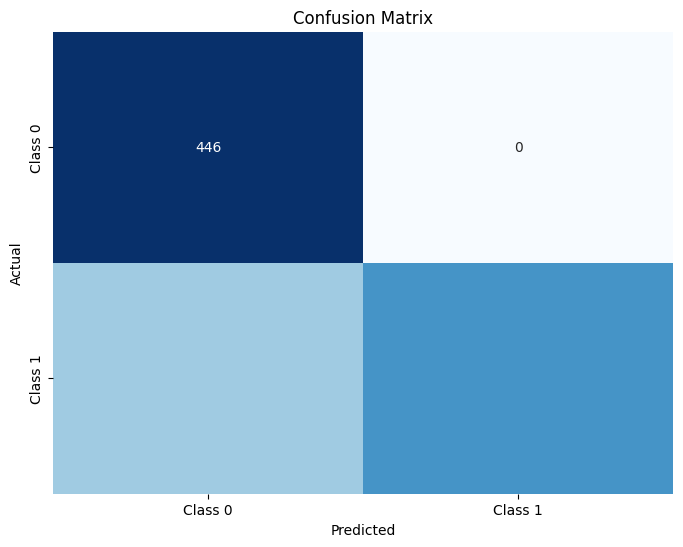

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()